## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [41]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1122986115.py:14: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

/tmp/ipython-input-3576190538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Subscription Status",y="Purchase Amount (USD)",data=df,palette="Set2")


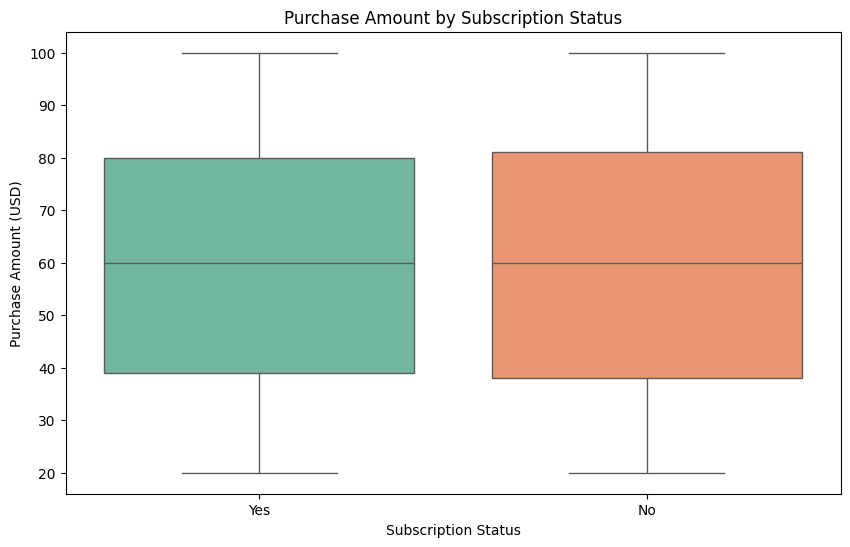

In [10]:

plt.figure(figsize=(10,6))
sns.boxplot(x="Subscription Status",y="Purchase Amount (USD)",data=df,palette="Set2")
plt.title("Purchase Amount by Subscription Status")
plt.show()



from these boxplots ,there are not outliers

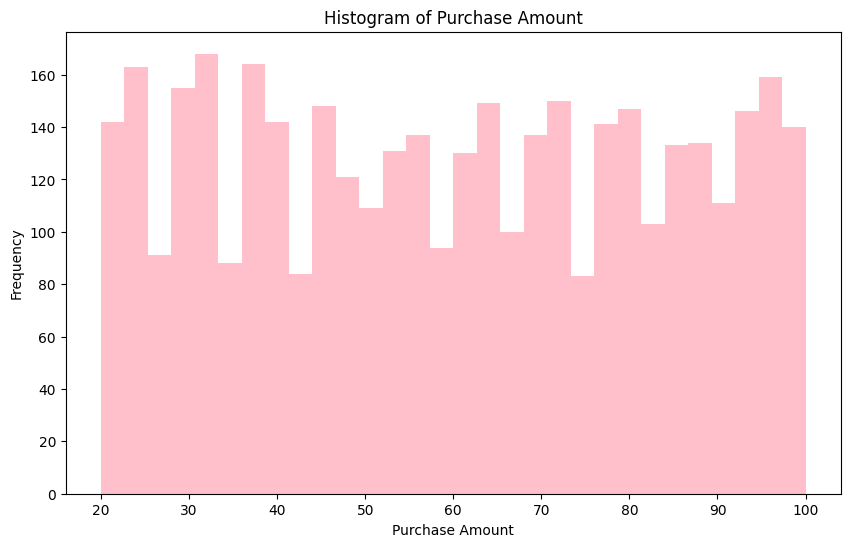

In [17]:
plt.figure(figsize=(10,6))
plt.hist(df["Purchase Amount (USD)"],bins=30,color="pink")
plt.title("Histogram of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

/tmp/ipython-input-2656179817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment Method",data=df,palette="Set2",order=df["Payment Method"].value_counts().index)


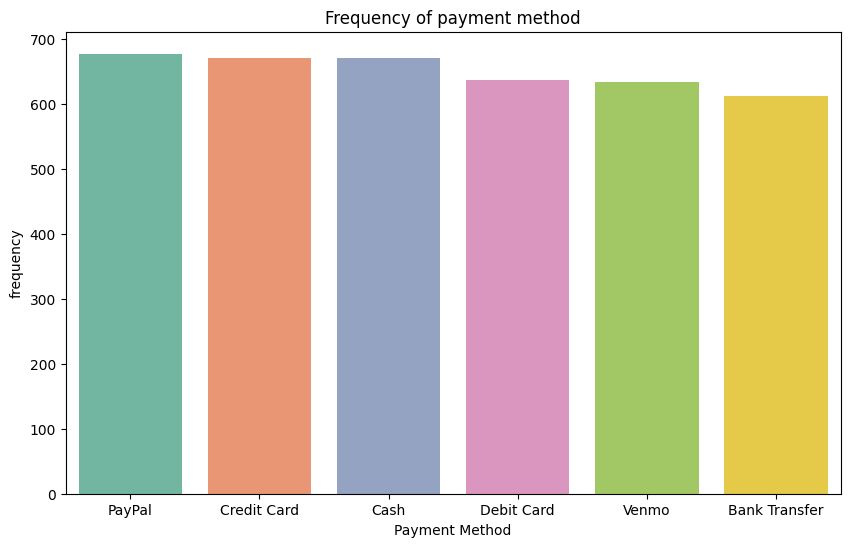

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x="Payment Method",data=df,palette="Set2",order=df["Payment Method"].value_counts().index)
plt.title("Frequency of payment method")
plt.xlabel("Payment Method")
plt.ylabel("frequency")
plt.show()

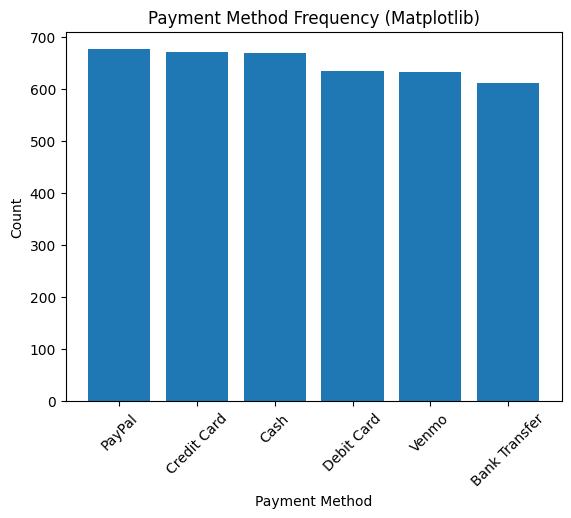

In [23]:
plt.figure()

counts = df["Payment Method"].value_counts()

plt.bar(counts.index, counts.values)

plt.title("Payment Method Frequency (Matplotlib)")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

<Figure size 1000x600 with 0 Axes>

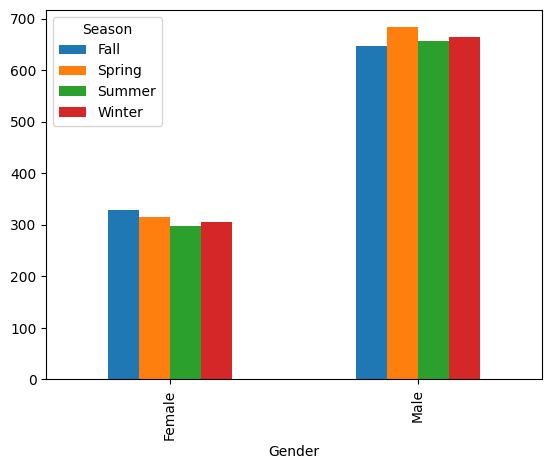

In [25]:
plt.figure(figsize=(10,6))
grouped = df.groupby(["Gender", "Season"]).size().unstack()
grouped.plot(kind="bar")
plt.show()



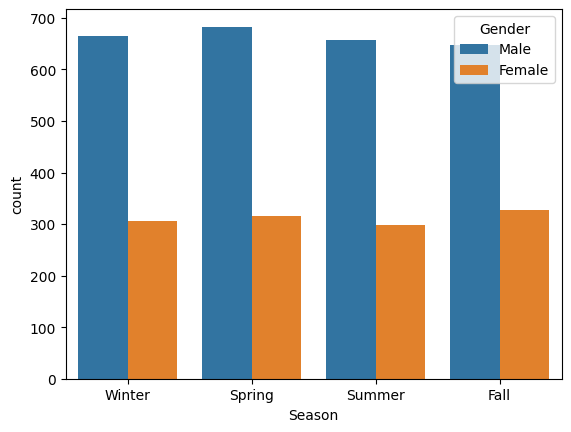

In [26]:
plt.figure()
sns.countplot(x="Season", hue="Gender", data=df)
plt.show()

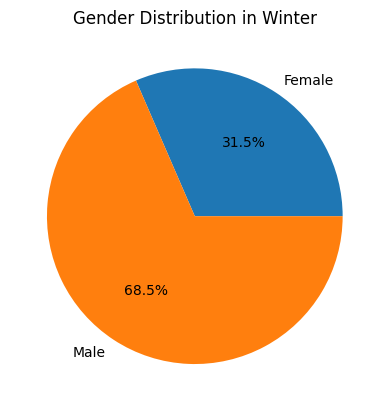

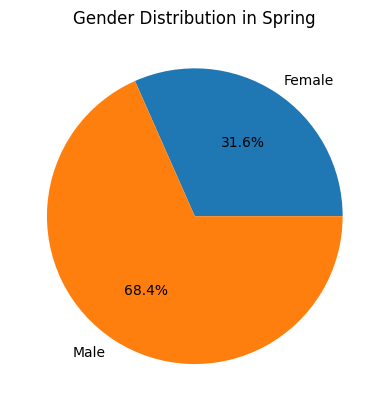

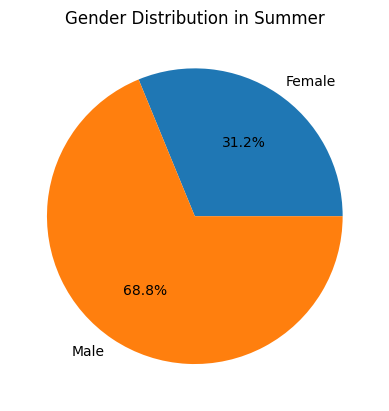

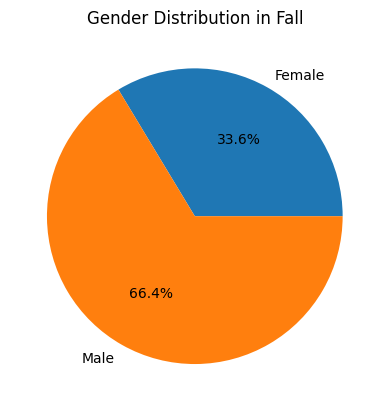

In [27]:
gender_season = df.groupby(["Season", "Gender"]).size()

for season in df["Season"].unique():
    plt.figure()
    gender_season[season].plot(kind="pie", autopct="%1.1f%%")
    plt.title(f"Gender Distribution in {season}")
    plt.ylabel("")
    plt.show()

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

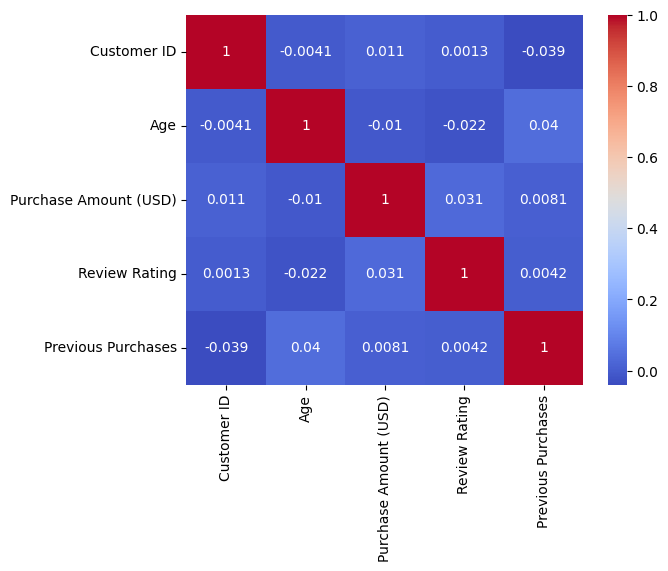

In [28]:
numeric_df = df.select_dtypes(include="number")

plt.figure()
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

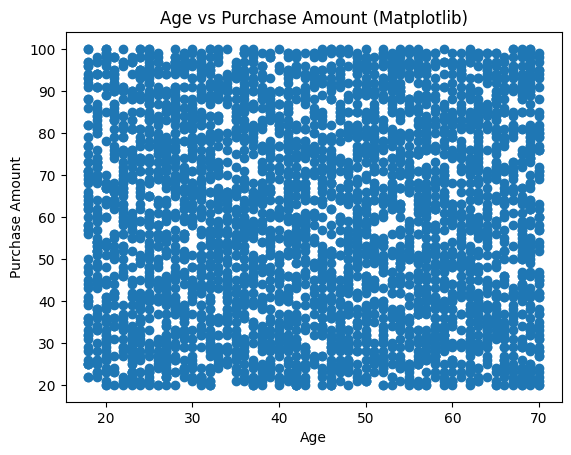

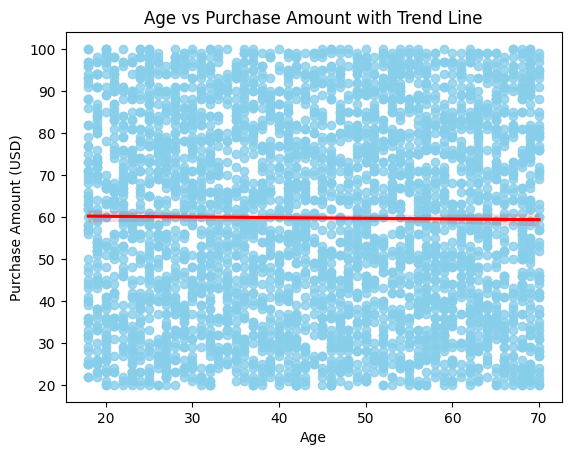

In [35]:
plt.figure()
plt.scatter(df["Age"], df["Purchase Amount (USD)"])
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.title("Age vs Purchase Amount (Matplotlib)")
plt.show()

plt.figure()
sns.regplot(x="Age", y="Purchase Amount (USD)", data=df,scatter_kws={"color": "skyblue"},
            line_kws={"color": "red"})
plt.title("Age vs Purchase Amount with Trend Line")
plt.show()


### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

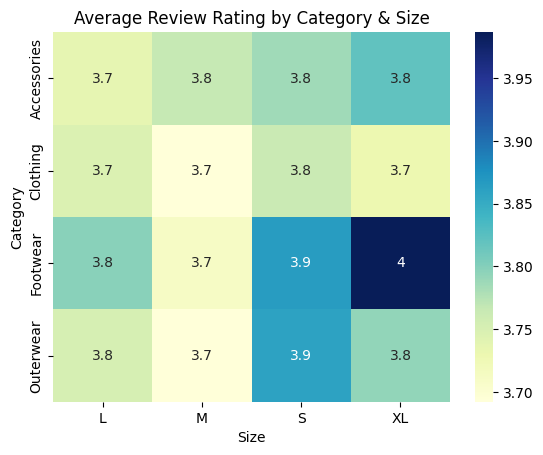

In [36]:
pivot_rating = df.pivot_table(values="Review Rating", index="Category", columns="Size")

plt.figure()
sns.heatmap(pivot_rating, annot=True, cmap="YlGnBu")
plt.title("Average Review Rating by Category & Size")
plt.show()


### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

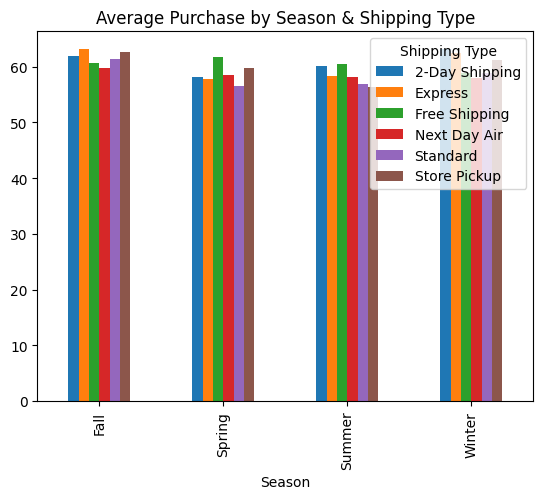

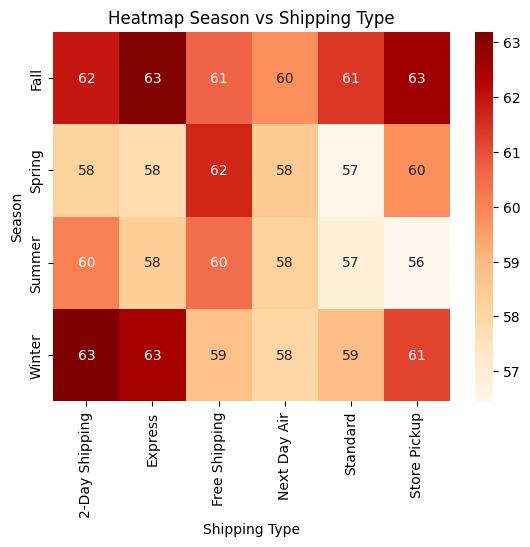

In [37]:
pivot_purchase = df.pivot_table(values="Purchase Amount (USD)", index="Season", columns="Shipping Type")

pivot_purchase.plot(kind="bar")
plt.title("Average Purchase by Season & Shipping Type")
plt.show()

plt.figure()
sns.heatmap(pivot_purchase, annot=True, cmap="OrRd")
plt.title("Heatmap Season vs Shipping Type")
plt.show()


### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

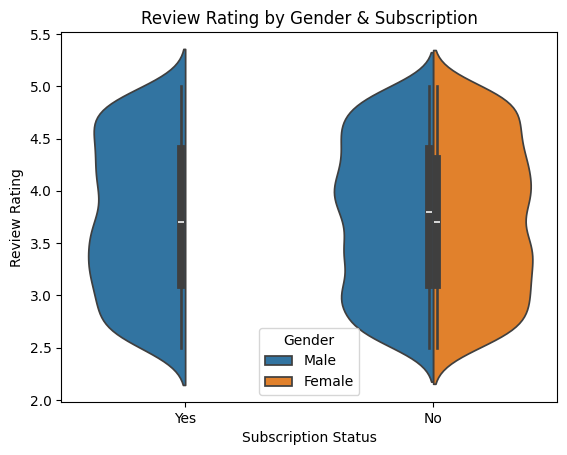

In [38]:
plt.figure()
sns.violinplot(x="Subscription Status", y="Review Rating", hue="Gender", data=df, split=True)
plt.title("Review Rating by Gender & Subscription")
plt.show()


### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

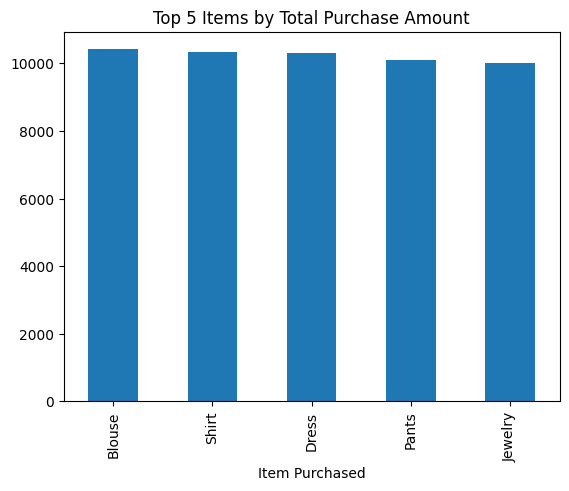

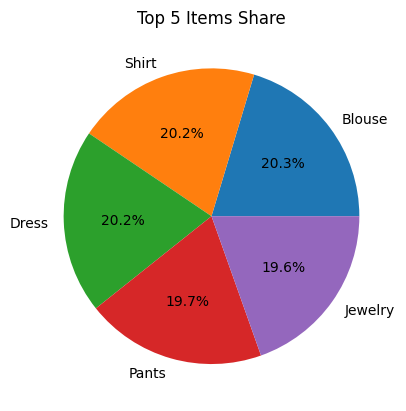

In [39]:
top_items = df.groupby("Item Purchased")["Purchase Amount (USD)"].sum().sort_values(ascending=False).head(5)

top_items.plot(kind="bar")
plt.title("Top 5 Items by Total Purchase Amount")
plt.show()

plt.figure()
top_items.plot(kind="pie", autopct="%1.1f%%")
plt.title("Top 5 Items Share")
plt.ylabel("")
plt.show()


### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

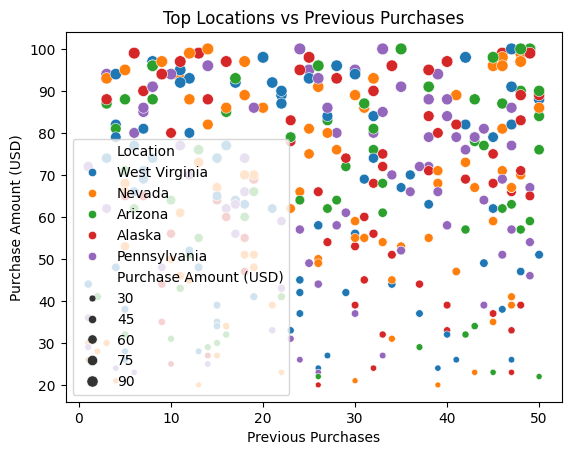

In [40]:
top_locations = df.groupby("Location")["Purchase Amount (USD)"].mean().sort_values(ascending=False).head(5)
top_loc_df = df[df["Location"].isin(top_locations.index)]

plt.figure()
sns.scatterplot(x="Previous Purchases", y="Purchase Amount (USD)", size="Purchase Amount (USD)", hue="Location", data=top_loc_df)
plt.title("Top Locations vs Previous Purchases")
plt.show()


### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

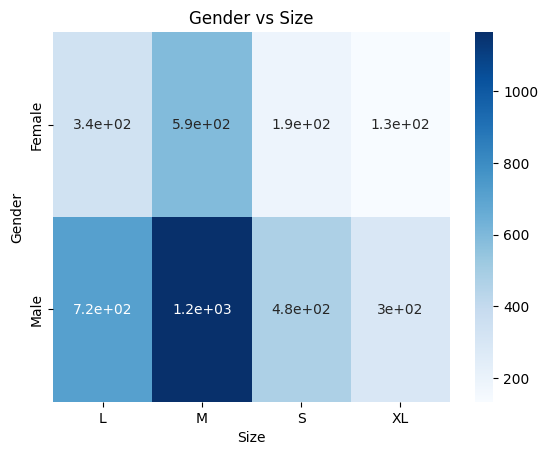

In [42]:
size_gender = pd.crosstab(df["Gender"], df["Size"])

plt.figure()
sns.heatmap(size_gender, annot=True, cmap="Blues")
plt.title("Gender vs Size")
plt.show()


### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

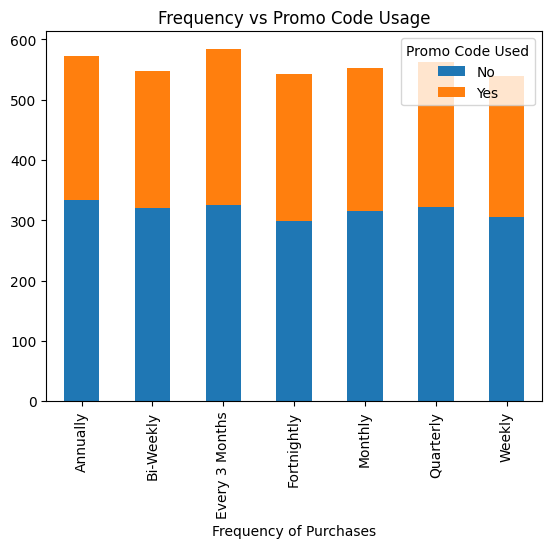

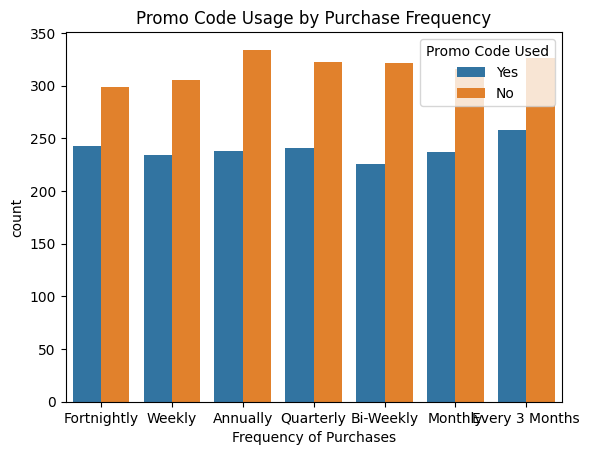

In [43]:
freq_promo = pd.crosstab(df["Frequency of Purchases"], df["Promo Code Used"])

freq_promo.plot(kind="bar", stacked=True)
plt.title("Frequency vs Promo Code Usage")
plt.show()

plt.figure()
sns.countplot(x="Frequency of Purchases", hue="Promo Code Used", data=df)
plt.title("Promo Code Usage by Purchase Frequency")
plt.show()


### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

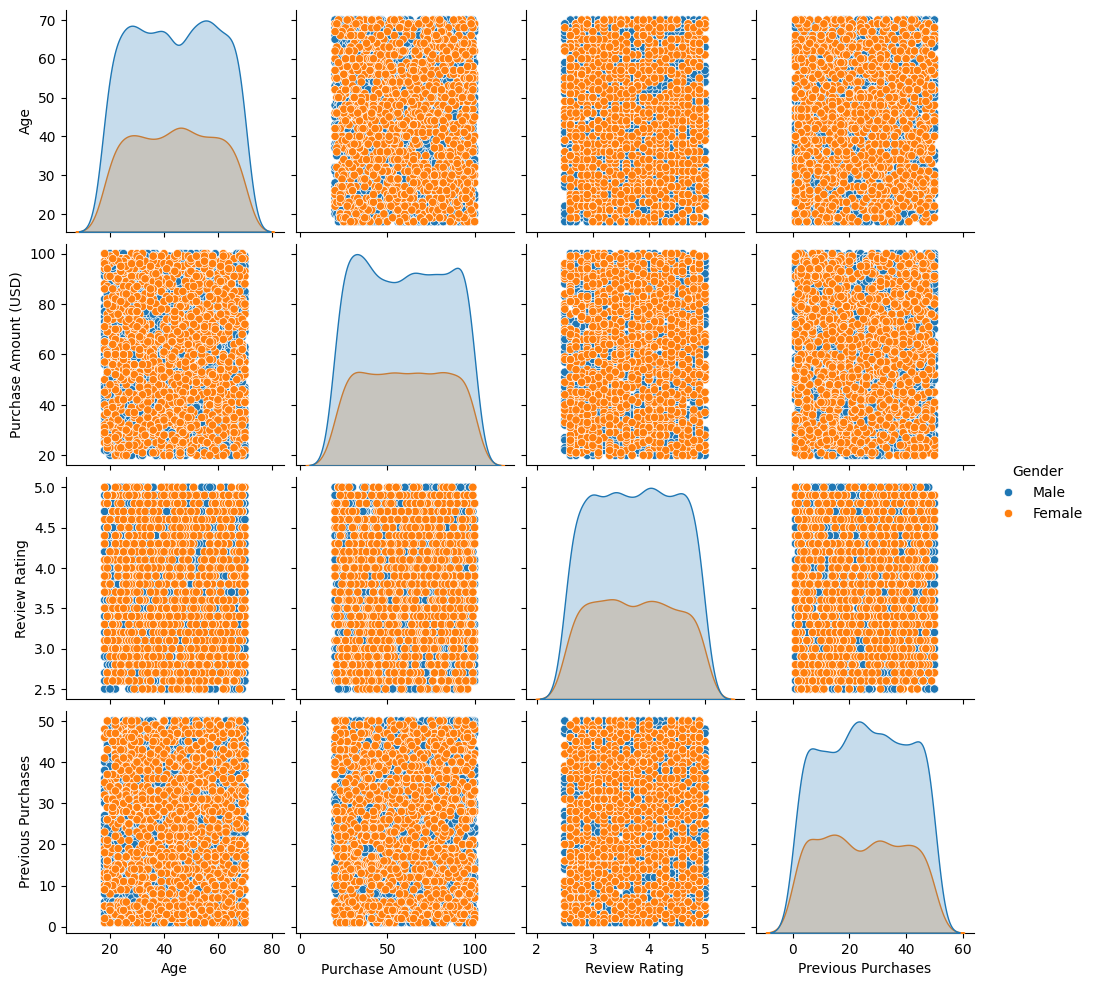

In [44]:
sns.pairplot(df, hue="Gender", vars=["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"])
plt.show()
